In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ArmStrength.csv')

In [3]:
print(data)

    Arm Strength  Dynamic Lift
0           17.3          71.7
1           19.3          48.3
2           19.5          88.3
3           19.7          75.0
4           22.9          91.7
5           23.1         100.0
6           26.4          73.3
7           26.8          65.0
8           27.3          75.7
9           29.3          88.3
10          29.5          88.3
11          29.7          95.0
12          32.9          91.7
13          33.1         100.0
14          36.4         103.3
15          36.8         105.0


In [4]:
x = np.ones(len(data)*2)
x = x.reshape(len(data),2)

In [5]:
for d in data.iterrows():
    x[d[0]][1] = d[1][0]

In [6]:
print(x)

[[ 1.  17.3]
 [ 1.  19.3]
 [ 1.  19.5]
 [ 1.  19.7]
 [ 1.  22.9]
 [ 1.  23.1]
 [ 1.  26.4]
 [ 1.  26.8]
 [ 1.  27.3]
 [ 1.  29.3]
 [ 1.  29.5]
 [ 1.  29.7]
 [ 1.  32.9]
 [ 1.  33.1]
 [ 1.  36.4]
 [ 1.  36.8]]


In [7]:
y = data['Dynamic Lift']
w = np.ones(2)

In [8]:
def costFunction(x,y,w):
    m = len(x)
    mat = np.matmul(x,w)
    mat = np.subtract(mat,y)
    J = np.matmul(mat.transpose(),mat)/m
    return J
costFunction(x,y,w)

3416.09875

In [9]:
def gradient(x,y,w,learning_rate,iterations=100000,stoping_threshold=0.000000000001):
    prev_cost = None
    bol = True
    for i in range(iterations):
        crnt_cost = costFunction(x,y,w)
        if prev_cost is not None and abs(prev_cost - crnt_cost) <= stoping_threshold:
            break
        m = len(x)
        prev_cost = crnt_cost
        derivative = np.subtract(np.matmul(x,w), y)
        w[0] = w[0] - learning_rate*sum(derivative)
        w[1] = w[1] - learning_rate*np.matmul(x[:,1],derivative)
    print(i)
    return w

In [10]:
b = gradient(x,y,w,0.0001)

99999


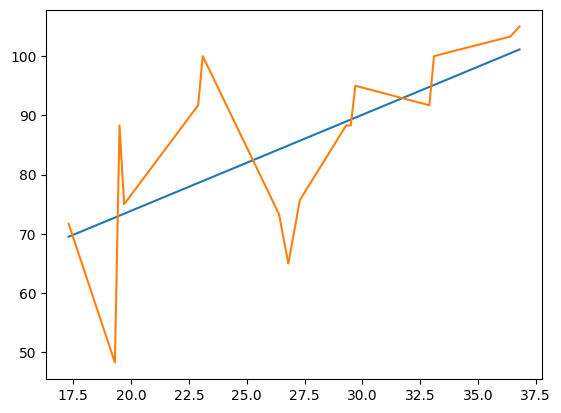

In [11]:
plt.plot(x[:,1],[b[0] + i*b[1] for i in x[:,1]])
plt.plot(x[:,1],data['Dynamic Lift'])

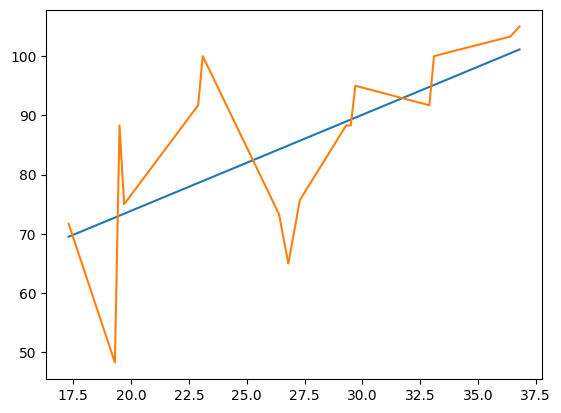

In [12]:
plt.plot(x[:,1],[b[0] + i*b[1] for i in x[:,1]])
plt.plot(x[:,1],data['Dynamic Lift'])